## Continuation of Task 4.10, Part Two (Steps 6-10).

# Table of content:

# 1. Importing Data and Libraries
# 2. Creating an appropriate visualization to show the distribution of profiles:
### - Distribution of Family Profiles
### - Basic stats for Family Profile
### - Comparing customer profiles with regions and departments
### - Family Profile Distribution by Region
### - Family Profile Distribution by Department
### - Income (income_group) distribution stats
### - Income (income_group) Distribution
### - Income (income_group) By Region
### - Income Group Distribution by Department
### - Distribution of Age Groups
### - Age Group by Region
### - Age Group by Department
### - Most Requested Departments
### - Departments by Region
# 3. Sales Team Key Questions - Answers
### Busiest days of the week
### Busiest hours of the day
### Hours during the day when people spend more money
### Price Range Groupings
### Income Distribution By Price Range
### Price Range & Family Profile Distribution
### Departments Frequency
### User Distribution - Brand Loyalty
### Ordering Habits Based on Customer’s Loyalty Status
### Ordering Habits Based On a Customer’s Region
### Connection between age and family status in terms of ordering habits
### Exploring whether there is a connection between age and spending power (income)
### Age and Family Status in Ordering Habits
### Marital status

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Path 
path = r'C:\Users\ideal\OneDrive\Documents\Task 4.6.7.8.9.10'

In [3]:
# Downloading the most recent data frame with the lastest additions - 'df_end_final.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_end_final.pkl'))

In [4]:
# Removing the limit to the amount of columns displayed by default: 
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,user_id,gender,state,age,date_joined,n_dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg,avg_price,spending_flag,customer_order_frequency,order_frequency_flag,region,activity_flag,age_group,income_group,departments,dependants_group,family_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,8,7.988889,Low spender,19.0,Regular customer,Midwest,active customer,45-59 years old,High Income,beverages,Has dependants,married female with children
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8,7.988889,Low spender,19.0,Regular customer,Midwest,active customer,45-59 years old,High Income,beverages,Has dependants,married female with children
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,8,7.988889,Low spender,19.0,Regular customer,Midwest,active customer,45-59 years old,High Income,beverages,Has dependants,married female with children
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,12,7.057534,Low spender,26.0,Regular customer,West,active customer,30-44 years old,Low Income,beverages,No dependants,"single female, no children"
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,1,20,16.0,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,12,Regular customer,12,7.057534,Low spender,26.0,Regular customer,West,active customer,30-44 years old,Low Income,beverages,No dependants,"single female, no children"


In [6]:
df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_last_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg', 'avg_price', 'spending_flag', 'customer_order_frequency',
       'order_frequency_flag', 'region', 'activity_flag', 'age_group',
       'income_group', 'departments', 'dependants_group', 'family_profile'],
      dtype='object')

## Creating an appropriate visualization to show the distribution of profiles 

### Distribution of Family Profiles

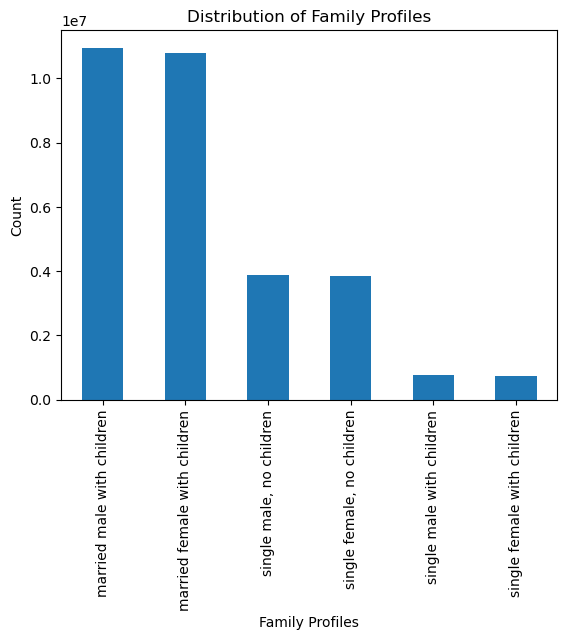

In [7]:
family_profile_distribution_bar = df['family_profile'].value_counts().plot.bar()
plt.title('Distribution of Family Profiles')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.show()

In [8]:
# Exporting the bar outside Jupyter through figure.savefig() - family_profile_distribution_bar
family_profile_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization 4.10', 'family_profile_distribution_bar.png'))

### Basic stats for Family Profile

In [9]:
# Aggregating the max, mean, and min variables on a customer-profile level (family_profile) for usage frequency and expenditure
family_profile_agg = df.groupby('family_profile').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [10]:
family_profile_agg

order_id   prices                
                                 count      min      mean   max
family_profile                                                 
married female with children  10795965  0.99999  7.785418  25.0
married male with children    10947746  0.99999  7.793031  25.0
single female with children     723576  0.99999  7.791501  25.0
single female, no children     3858283  0.99999  7.791352  25.0
single male with children       757596  0.99999  7.807678  25.0
single male, no children       3881398  0.99999  7.785831  25.0

## Comparing customers profiles with regions and departments

### Family Profile Distribution by Region

In [11]:
# family_profile in different regions 
fam_region_profile = pd.crosstab(df['family_profile'],df['region'], dropna = False)

In [12]:
fam_region_profile

region,Midwest,Northeast,South,West
family_profile,,,,
married female with children,2560027,1857323,3568649,2809966
married male with children,2527235,1996450,3655100,2768961
single female with children,171913,118687,254123,178853
"single female, no children",905542,663656,1314256,974829
single male with children,179522,137743,251334,188997
"single male, no children",917274,690826,1267677,1005621


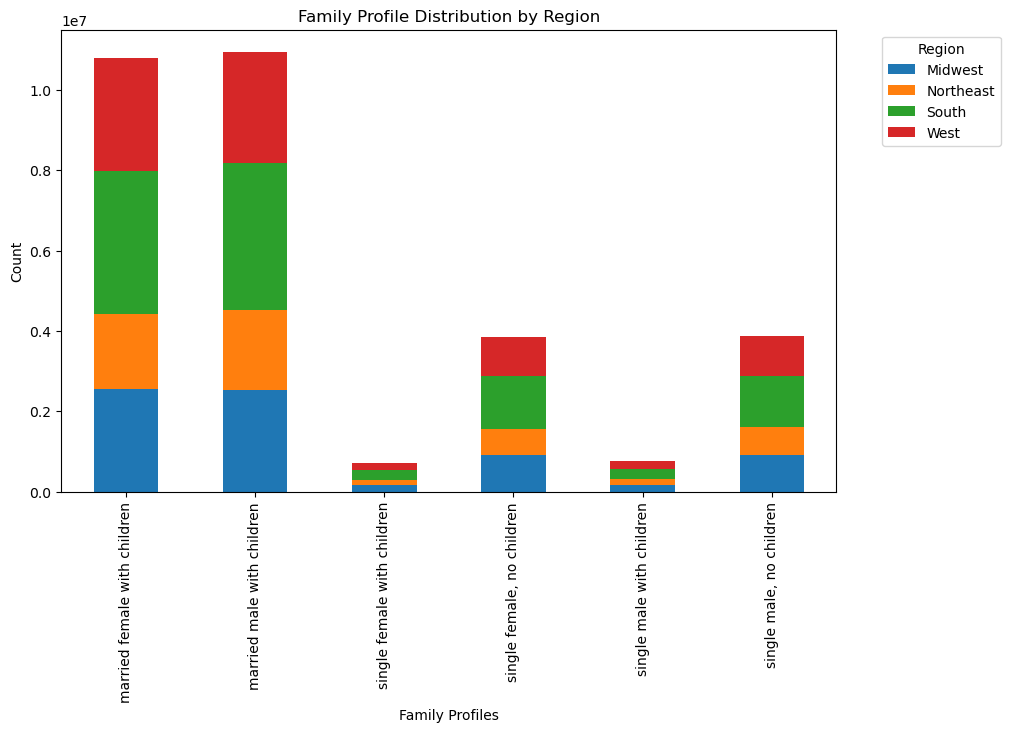

In [13]:
fam_region_profile_bar_stacked = fam_region_profile.plot.bar(stacked=True, figsize=(10, 6))

plt.title('Family Profile Distribution by Region')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

In [16]:
fam_region_profile_bar_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualization 4.10', 'fam_region_profile_bar_stacked.png'))

## Family Profile Distribution by Department

In [34]:
# Comparing family_profile in different departments - crosstab created 
fam_departments_profile = pd.crosstab(df['departments'],df['family_profile'], dropna = False)

In [35]:
fam_departments_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
departments,,,,,,
alcohol,52459,46962,3784,18601,4595,18226
babies,140919,146764,9253,50469,10128,52859
bakery,393456,392293,26351,139336,27333,142059
beverages,899671,907782,58292,322421,60815,322920
breakfast,235315,235905,16347,82811,16851,83621
bulk,11884,11934,777,4081,856,3919
canned goods,351369,361208,22967,124165,25510,126855
dairy eggs,1803780,1828819,122983,647898,127224,646478
deli,349284,353049,23776,126183,24343,127199


<Figure size 1000x1200 with 0 Axes>

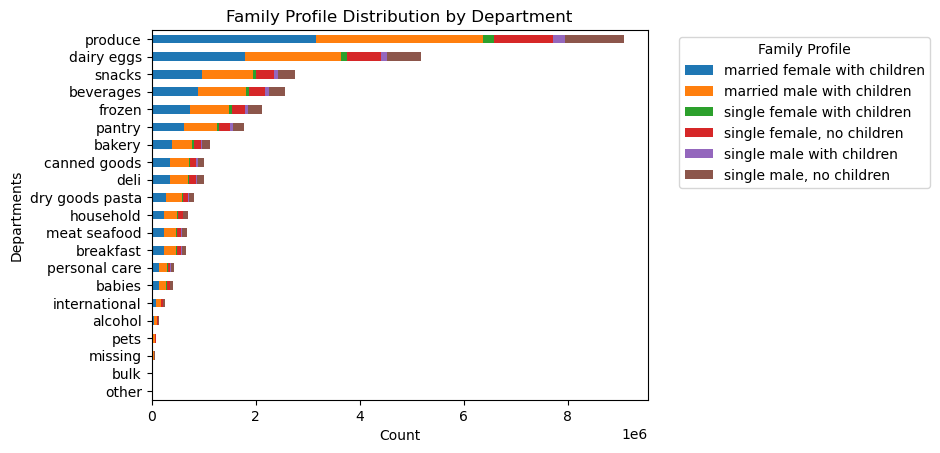

In [46]:
fam_departments_profile_bar = fam_departments_profile.sort_values(by='married female with children', ascending=True)

plt.figure(figsize=(10, 12))  
fam_departments_profile.plot.barh(stacked=True)

plt.title('Family Profile Distribution by Department')
plt.xlabel('Count')
plt.ylabel('Departments')
plt.legend(title='Family Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization 4.10', 'fam_departments_profile_bar.png'))

# Show the plot
plt.show()

plt.show()


## Income (income_group) distribution stats

In [57]:
income_group_distribution_agg = df.groupby('income_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [60]:
income_group_distribution_agg

order_id   prices                
                  count      min      mean   max
income_group                                    
High Income     7741091  0.99999  7.947227  25.0
Low Income      7741348  1.00000  7.300459  25.0
Middle Income  15482125  0.99999  7.955341  25.0

## Income (income_group) Distribution

Text(0, 0.5, 'Count')

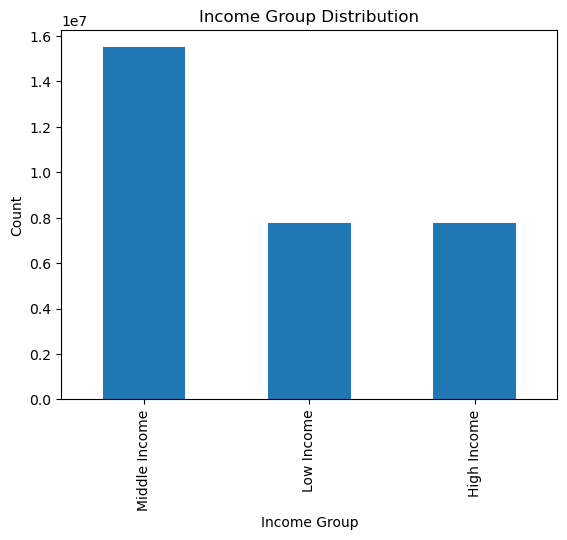

In [55]:
income_group_distribution = df['income_group'].value_counts().plot.bar()
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')

In [56]:
income_group_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualization 4.10', 'iincome_group_distribution_bar.png'))

## Income (income_group) By Region

In [62]:
income_group_region = pd.crosstab(df['income_group'],df['region'], dropna = False)

In [63]:
income_group_region

region,Midwest,Northeast,South,West
income_group,,,,
High Income,1841838,1372838,2549267,1977148
Low Income,1790670,1367074,2593563,1990041
Middle Income,3629005,2724773,5168309,3960038


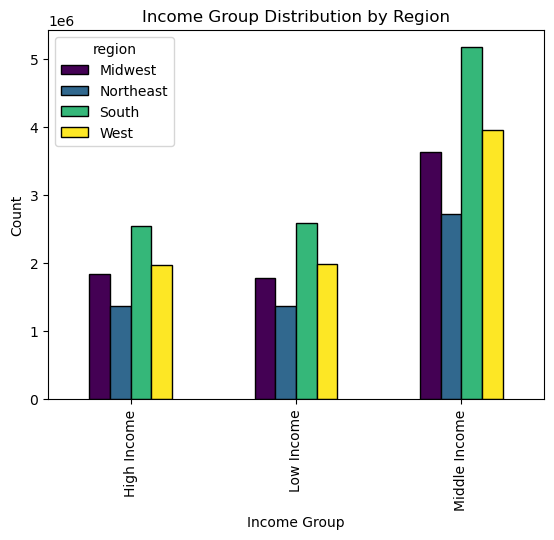

In [74]:
income_group_region_bar = income_group_region.plot(kind='bar', colormap='viridis', edgecolor='black')

# Adding labels and title
plt.title('Income Group Distribution by Region')
plt.xlabel('Income Group')
plt.ylabel('Count')

# Show the plot
plt.show()

In [75]:
income_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization 4.10', 'income_group_region_bar.png'))

## Income Group Distribution by Department

In [81]:
income_group_department = pd.crosstab(df['departments'],df['income_group'], dropna = False) 

In [82]:
income_group_department

income_group,High Income,Low Income,Middle Income
departments,,,
alcohol,40862,36825,66940
babies,105674,83835,220883
bakery,290423,264827,565578
beverages,618517,743205,1210179
breakfast,162877,187562,320411
bulk,7541,9400,16510
canned goods,265861,222477,523736
dairy eggs,1314008,1229252,2633922
deli,251016,248154,504664


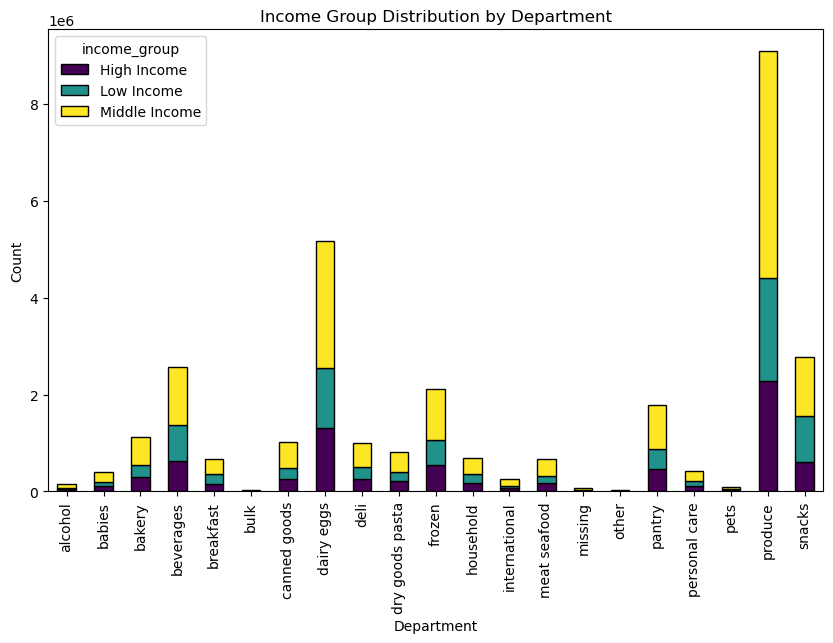

In [85]:
income_group_department_bar = income_group_department.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', figsize=(10, 6))

# Adding labels and title
plt.title('Income Group Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')

# Show the plot
plt.show()


In [86]:
income_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization 4.10', 'income_group_department_bar.png'))

## Distribution of Age Groups

In [107]:
age_group_agg = df.groupby('age_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [108]:
age_group_agg

order_id   prices                
                    count      min      mean   max
age_group                                         
18-29 years old   5817603  0.99999  7.781137  25.0
30-44 years old   7261366  0.99999  7.791532  25.0
45-59 years old   7311091  0.99999  7.787341  25.0
60-81 years old  10574504  0.99999  7.794455  25.0

Text(0, 0.5, 'Count')

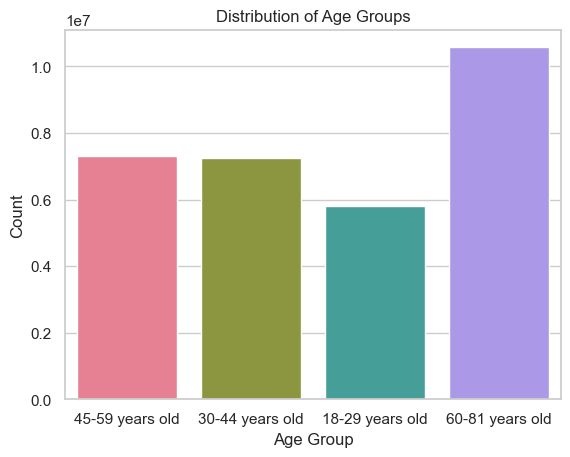

In [106]:
colors = sns.color_palette("husl", len(df['age_group'].unique()))
age_group_distribution_bar = sns.countplot(x='age_group', data=df, palette=colors)

# Adding labels and title
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

In [104]:
age_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization 4.10', 'age_group_distribution_bar.png'))

## Age Group by Region

In [114]:
age_group_region = pd.crosstab(df['region'], df['age_group'], dropna = False)

In [115]:
age_group_region

age_group,18-29 years old,30-44 years old,45-59 years old,60-81 years old
region,,,,
Midwest,1355838,1715150,1735082,2455443
Northeast,1023984,1258283,1298189,1884229
South,1960651,2447061,2382006,3521421
West,1477130,1840872,1895814,2713411


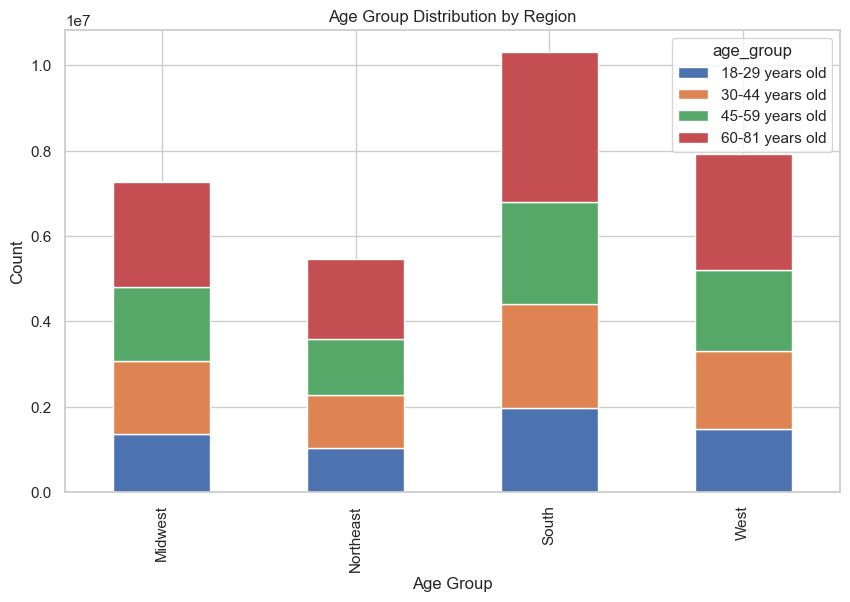

In [118]:
age_group_region_bar = age_group_region.plot(kind='bar', stacked=True, figsize=(10, 6))
# Adding labels and title
plt.title('Age Group Distribution by Region')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the plot
plt.show()

In [119]:
age_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization 4.10', 'age_group_region_bar.png'))

## Age Group by Department 

In [121]:
age_group_department = pd.crosstab(df['departments'], df['age_group'], dropna = False)

In [122]:
age_group_department

age_group,18-29 years old,30-44 years old,45-59 years old,60-81 years old
departments,,,,
alcohol,27938,33417,35676,47596
babies,77758,96520,97376,138738
bakery,210358,263669,264355,382446
beverages,477655,595539,615038,883669
breakfast,128115,156165,158819,227751
bulk,6414,7794,7819,11424
canned goods,192170,236621,238836,344447
dairy eggs,976278,1220342,1218050,1762512
deli,188533,235992,235974,343335


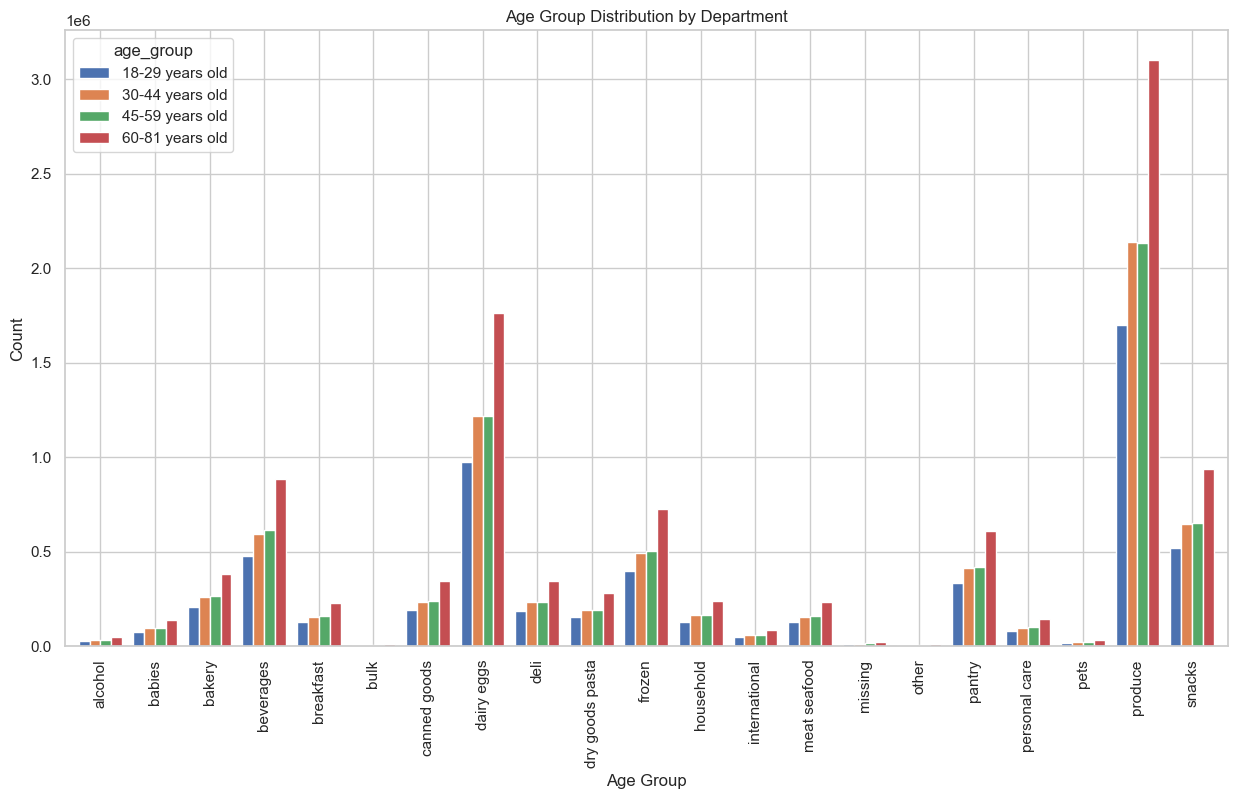

In [140]:
age_group_department_bar = age_group_department.plot(kind='bar', figsize=(15, 8), width=0.8)  # You can adjust the width as needed
plt.title('Age Group Distribution by Department')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [129]:
age_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization 4.10', 'age_group_department_bar.png'))

## Most Requested Departments

In [148]:
department_stats = df.groupby('departments').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [146]:
department_stats

order_id   prices                 
                   count      min       mean   max
departments                                       
bulk               33451  1.40000   8.346919  14.1
other              34411  1.10000   6.961995  15.0
missing            64768  1.00000   8.660655  15.0
pets               93060  1.00000   7.887489  15.0
alcohol           144627  1.00000   8.150699  15.0
international     255991  1.00000   7.678797  15.0
babies            410392  1.00000   7.634399  15.0
personal care     424306  1.00000   7.998744  15.0
breakfast         670850  1.00000   8.031647  14.9
meat seafood      674781  8.00000  16.300034  25.0
household         699857  1.00000   7.379951  15.0
dry goods pasta   822136  1.00000   7.349370  15.0
deli             1003834  1.00000   7.783347  15.0
canned goods     1012074  1.00000   7.546660  15.0
bakery           1120828  1.00000   7.857482  15.0
pantry           1782705  1.00000   8.014482  20.0
frozen           2121731  1.00000   7.733725  15.0
beverages        2571901  1.00000   7.682556  15.0
snacks           2766406  1.60000   4.275555   7.0
dairy eggs       5177182  0.99999   8.329861  15.0
produce          9079273  1.00000   7.980348  15.0

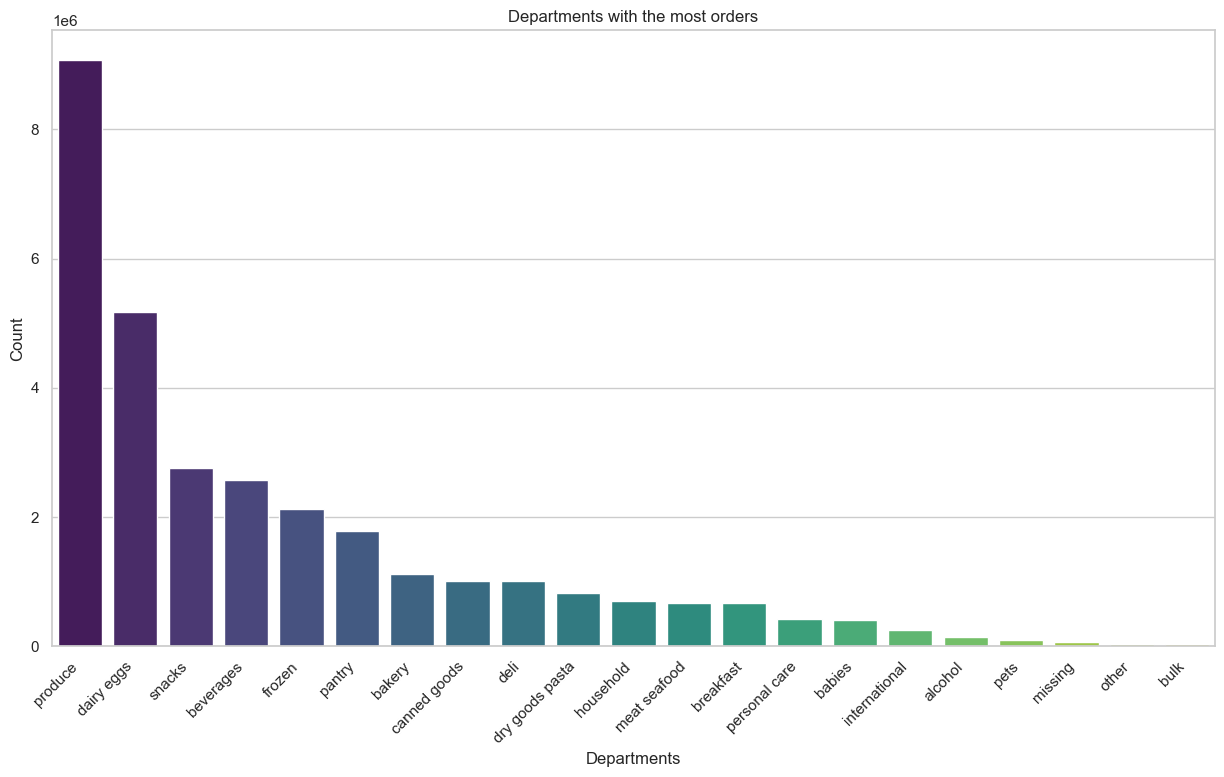

In [136]:
department_counts = df['departments'].value_counts()
departments_distribution_bar = plt.figure(figsize=(15, 8))
sns.barplot(x=department_counts.index, y=department_counts.values, palette='viridis')
plt.title('Departments with the most orders')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show() 

In [142]:
departments_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization 4.10', 'departments_distribution_bar.png'))

## Departments by Region 



In [150]:
depatments_region = pd.crosstab(df['departments'],df['region'], dropna = False)

In [151]:
depatments_region

region,Midwest,Northeast,South,West
departments,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


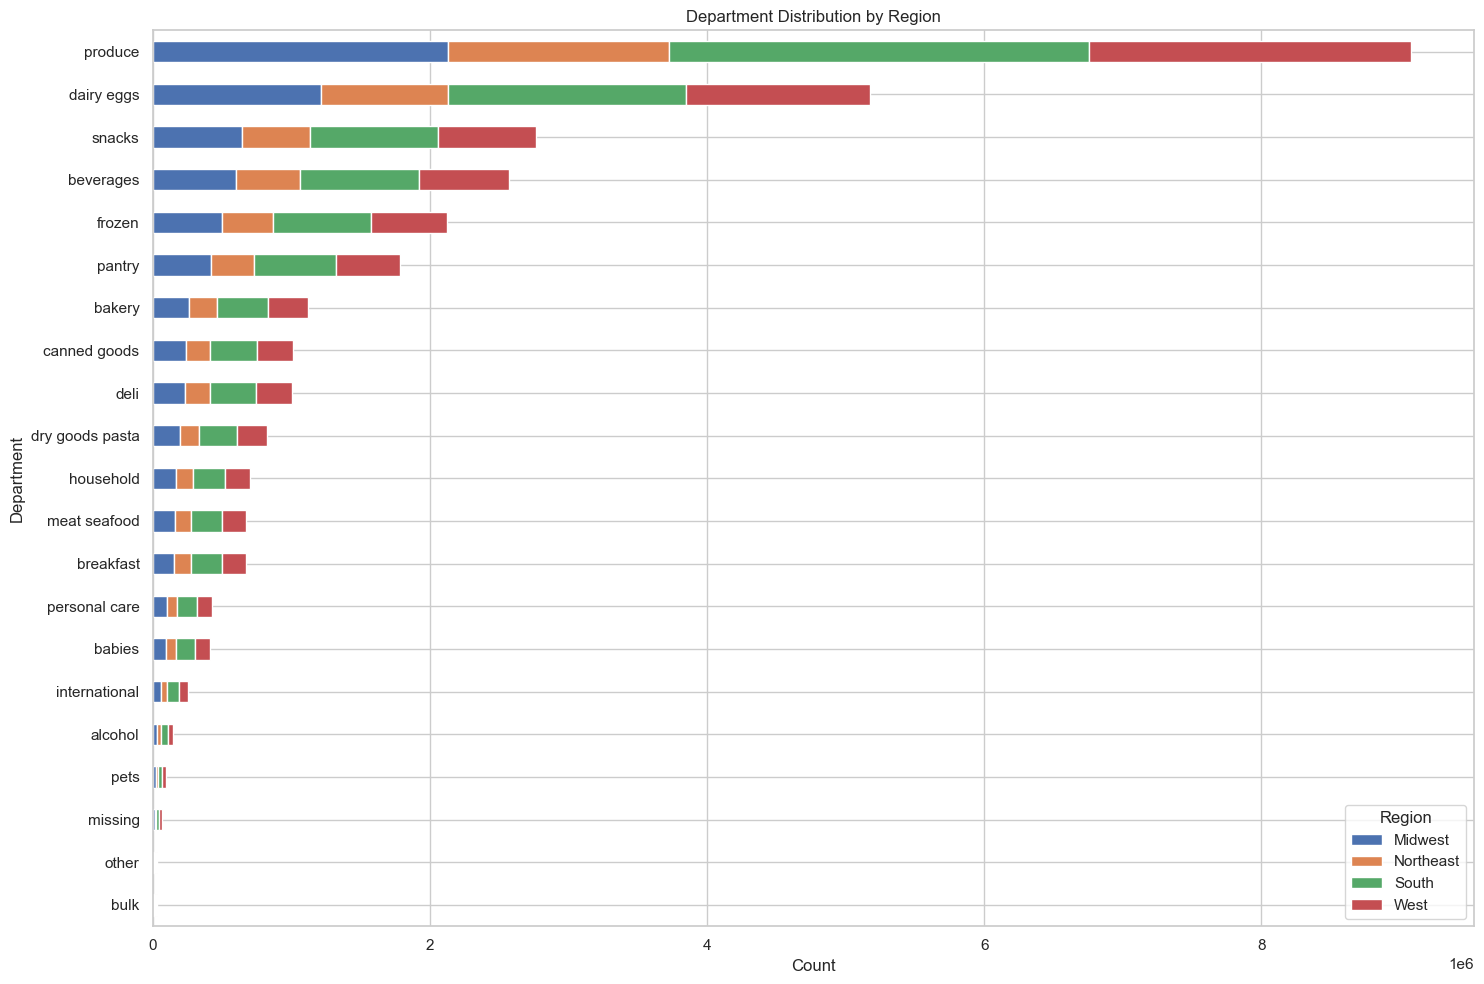

In [185]:
departments_region_bar = depatments_region.sort_values(by='Midwest', ascending=True).plot(kind='barh', stacked=True, figsize=(15, 10))
plt.title('Department Distribution by Region')
plt.xlabel('Count')
plt.ylabel('Department')
plt.legend(title='Region')
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization 4.10', 'departments_region_bar.png'))
plt.show()


In [186]:
departments_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization 4.10', 'departments_region_bar.png'))

# Sales Team Key Questions - Answers

### Busiest days of the week 

In [6]:
df['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: count, dtype: int64

In [6]:
#Knowing that 0 = Saturday, 1 = Sunday, 2=Monday, 3 = Tuesday, 4=  Wednesday, 5 = Thursday, 6  = Friday; I created a new column called 'week_days_orders'
df['week_days_orders'] = df['orders_day_of_week'].map({0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'})

In [7]:
df['week_days_orders'].value_counts(dropna = False)

week_days_orders
Saturday     5908610
Sunday       5411686
Friday       4291304
Thursday     4033729
Monday       4024706
Tuesday      3669535
Wednesday    3624994
Name: count, dtype: int64

In [9]:
busiest_week_days = df['week_days_orders'].value_counts(dropna = False)

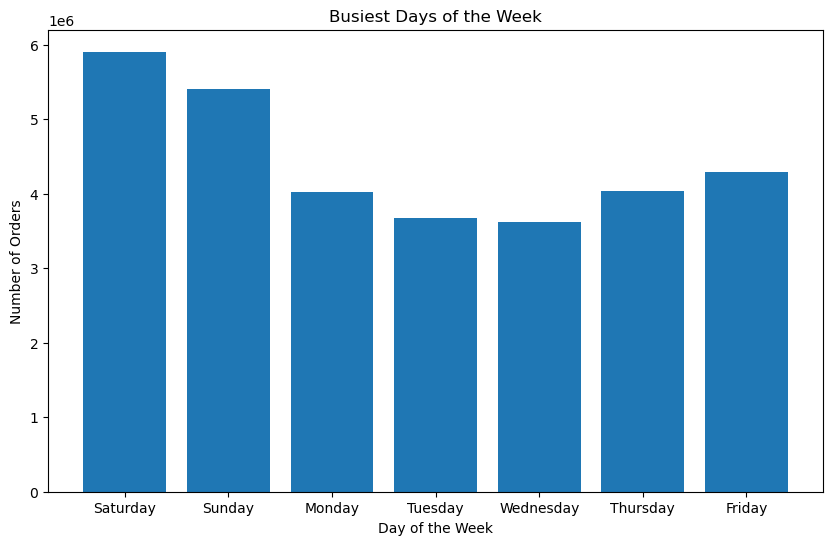

In [53]:
busiest_week_days_bar = df['week_days_orders'].value_counts()
# Sorting the days of the week in the correct order
days_of_week_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
busiest_week_days_bar = busiest_week_days_bar.reindex(days_of_week_order)
# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(busiest_week_days_bar.index, busiest_week_days_bar.values)
plt.title('Busiest Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization 4.10', 'busiest_week_days_bar.png'))
# Show the plot
plt.show()



## Busiest  hours of the day

Text(0.5, 0, 'Hour')

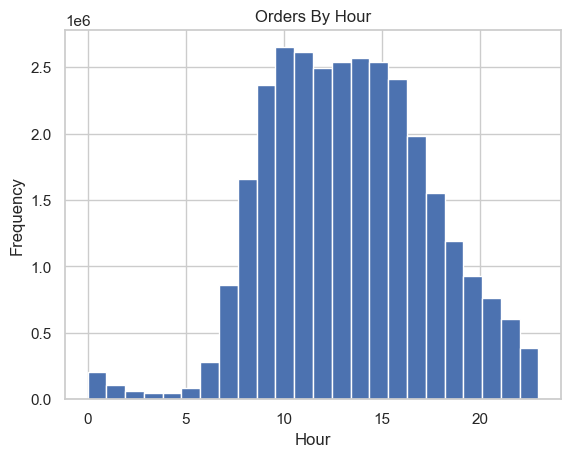

In [202]:
hist_order_hour_of_day = df['order_hour_of_day'].plot.hist(bins = 24, title = 'Orders By Hour')

In [203]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualization 4.10', 'hist_order_hour_of_day.png'))

## Hours during the day when people spend the more money


In [12]:
prices_by_hour = pd.crosstab(df['order_hour_of_day'],df['price_range_loc'], dropna = False)

In [13]:
prices_by_hour

price_range_loc,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,2618,64845,140579
1,1319,34049,74253
2,871,20636,44184
3,599,15041,33156
4,654,15721,34388
5,1001,26091,57326
6,3579,86945,190489
7,11147,267297,584769
8,20911,518557,1119642


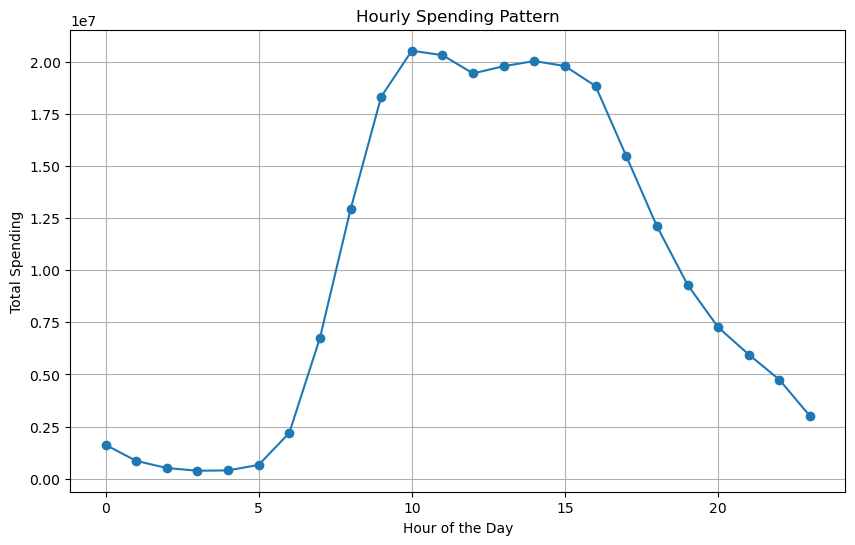

In [14]:
hourly_spending = df.groupby('order_hour_of_day')['prices'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hourly_spending.index, hourly_spending.values, marker='o')
ax.set_title('Hourly Spending Pattern')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Spending')
ax.grid(True)
# Save the plot
fig.savefig(os.path.join(path, '04 Analysis', 'Visualization 4.10', 'hourly_spending_plot.png'))


## Price Range Groupings

### Price range grouping I did create beforehand. The groupings are mid-range, low-range, and high-range under the "price_range_loc" column

In [8]:
df['prices'].describe()

count    3.096456e+07
mean     7.789588e+00
std      4.241014e+00
min      9.999900e-01
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

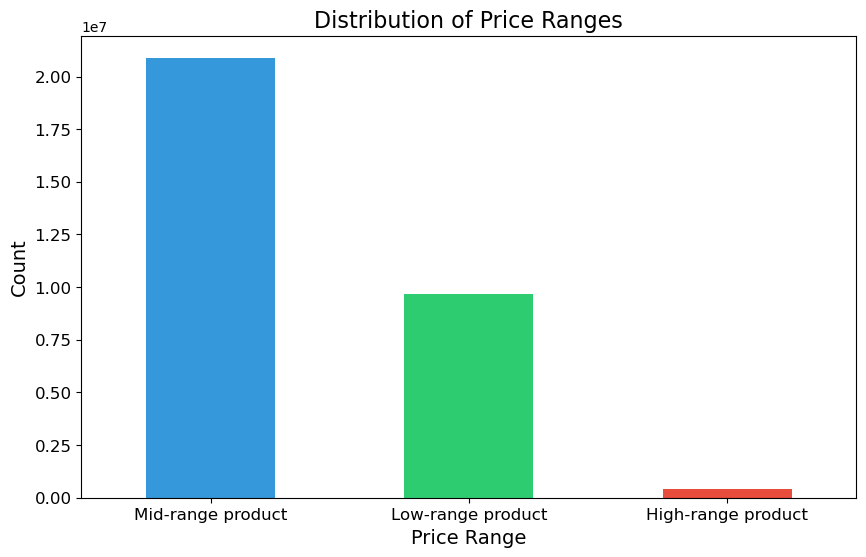

In [17]:
# Price range visual created from 'price_range_loc' grouping
price_range_bar = df['price_range_loc'].value_counts().plot.bar(title = 'Distribution of Price Ranges')

## Income Distribution By Price Range

In [21]:
price_range_income = pd.crosstab(df['price_range_loc'],df['income_group'], dropna = False)

In [22]:
price_range_income

income_group,High Income,Low Income,Middle Income
price_range_loc,,,
High-range product,107699,71569,213808
Low-range product,2308494,2771543,4599680
Mid-range product,5324898,4898236,10668637


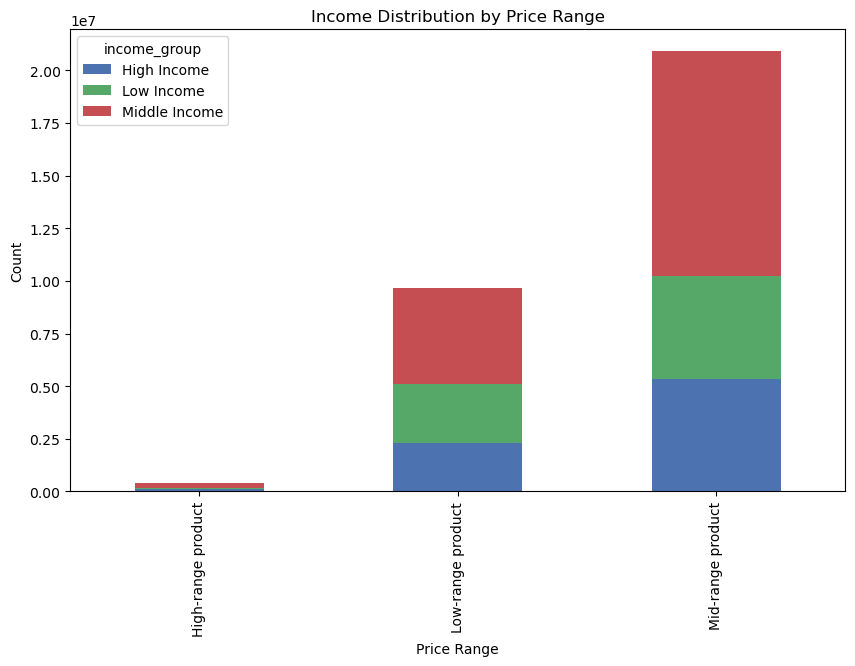

In [50]:
# Creating a stacked bar chart with custom colors
price_range_income.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4c72b0', '#55a868', '#c44e52'])
plt.title('Income Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization 4.10', 'price_range_income_bar.png'))


## Price Range & Family Profile Distribution 

In [55]:
price_range_family_profile = pd.crosstab(df['price_range_loc'],df['family_profile'], dropna = False)

In [56]:
price_range_family_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
price_range_loc,,,,,,
High-range product,137624,140366,9006,47492,9798,48790
Low-range product,3376830,3420476,226307,1206218,235693,1214193
Mid-range product,7281511,7386904,488263,2604573,512105,2618415


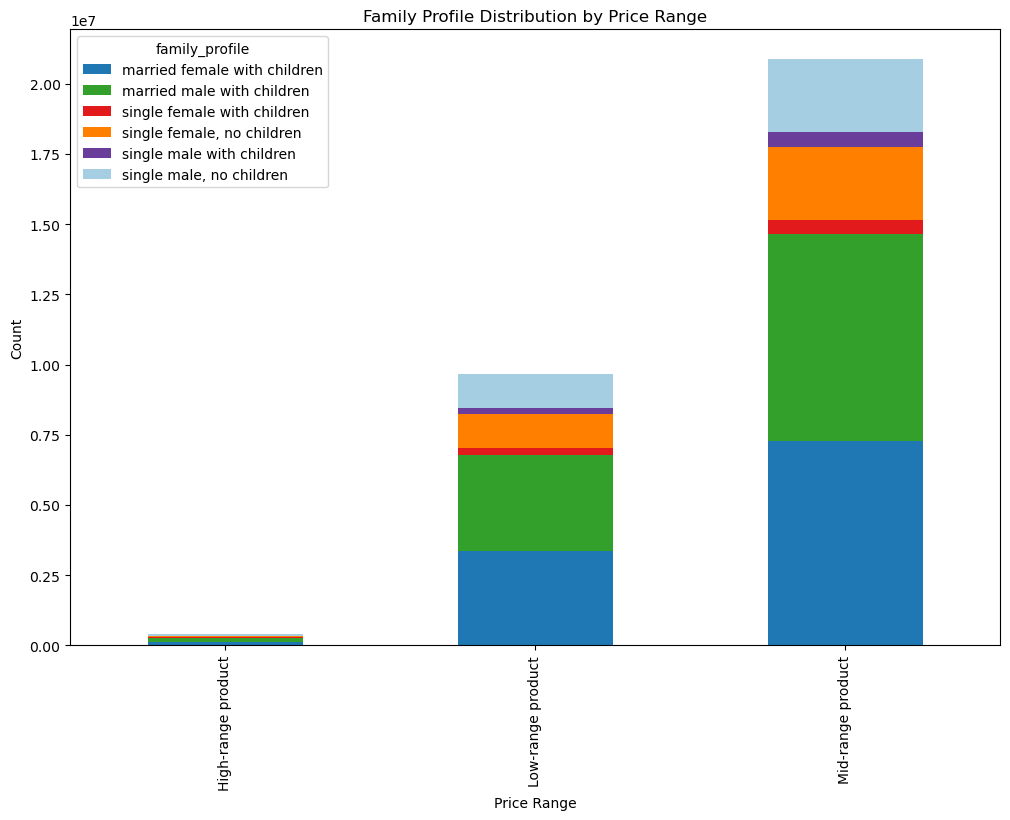

In [63]:
# Reorder columns for better visualization
price_range_family_profile = price_range_family_profile[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]
# Define custom colors
colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3']
# Create a bar chart with custom colors
price_range_family_profile.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
# Title and labels
plt.title('Family Profile Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization 4.10', 'price_range_family_profile_bar.png'))

## Departments Frequency

Text(0.5, 1.0, 'Orders by Department')

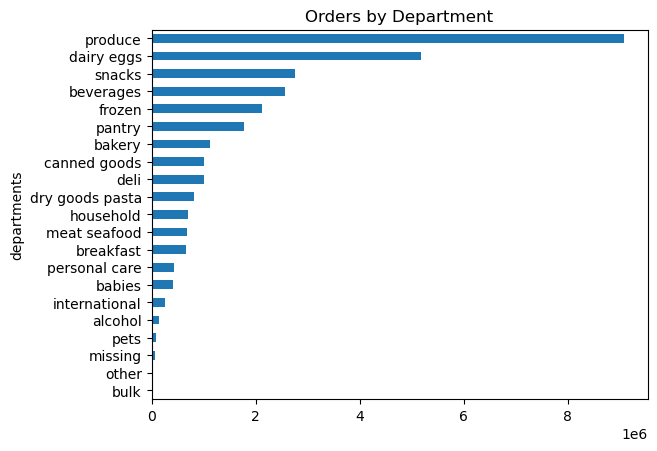

In [66]:
department_frequency = df['departments'].value_counts().sort_values(ascending=True).plot.barh()
plt.title("Orders by Department")

In [67]:
department_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualization 4.10', 'department_frequency_bar_bar.png'))

In [8]:
df.head()

,user_id,gender,state,age,date_joined,n_dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg,avg_price,spending_flag,customer_order_frequency,order_frequency_flag,region,activity_flag,age_group,income_group,departments,dependants_group,family_profile,week_days_orders
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,8,7.988889,Low spender,19.0,Regular customer,Midwest,active customer,45-59 years old,High Income,beverages,Has dependants,married female with children,Sunday
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8,7.988889,Low spender,19.0,Regular customer,Midwest,active customer,45-59 years old,High Income,beverages,Has dependants,married female with children,Thursday
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,8,7.988889,Low spender,19.0,Regular customer,Midwest,active customer,45-59 years old,High Income,beverages,Has dependants,married female with children,Sunday
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,12,7.057534,Low spender,26.0,Regular customer,West,active customer,30-44 years old,Low Income,beverages,No dependants,"single female, no children",Friday
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,1,20,16.0,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,12,Regular customer,12,7.057534,Low spender,26.0,Regular customer,West,active customer,30-44 years old,Low Income,beverages,No dependants,"single female, no children",Sunday


## User Distribution - Brand Loyalty

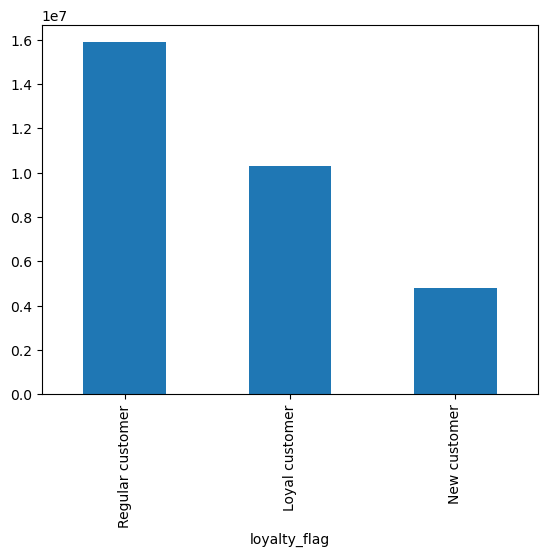

In [14]:
# "Regular Customers" make up most of the instacart users 
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar()

## Ordering Habits Based on Customer’s Loyalty Status

In [16]:
loyalty_flag_departments = pd.crosstab(df['departments'],df['loyalty_flag'], dropna = False)

In [17]:
loyalty_flag_departments

loyalty_flag,Loyal customer,New customer,Regular customer
departments,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


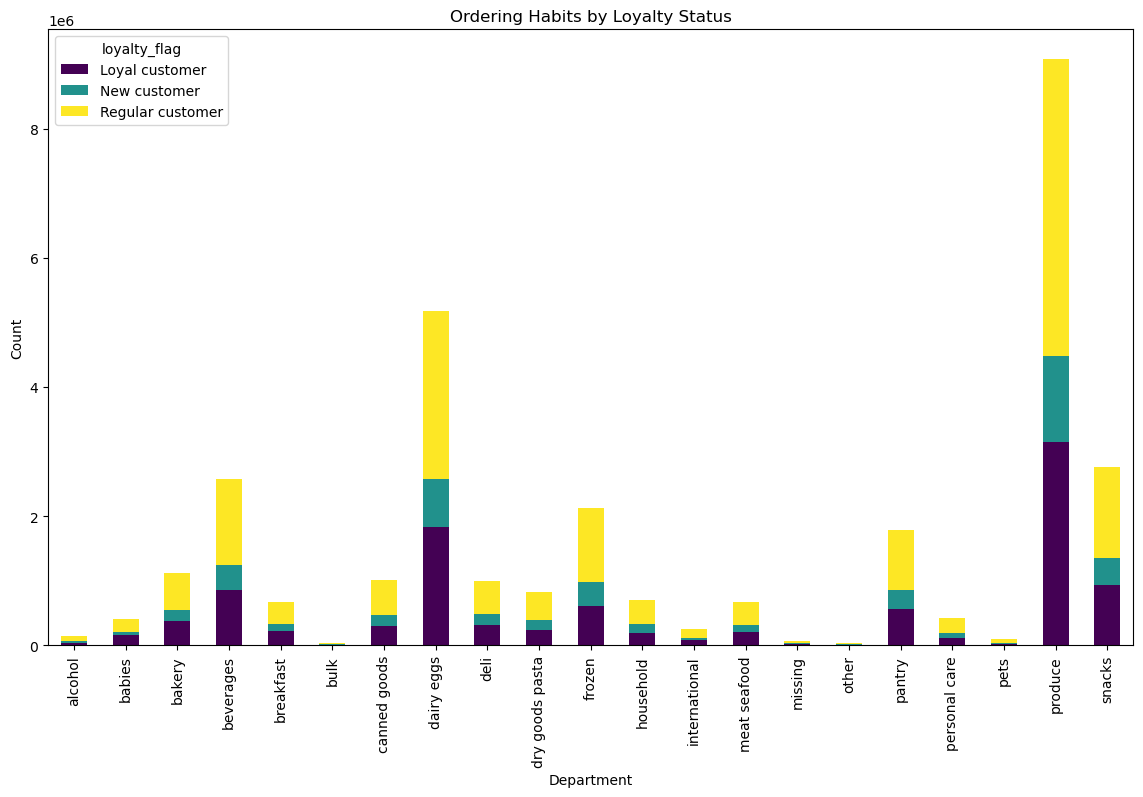

In [19]:
# Create a crosstab of loyalty_flag and departments
loyalty_flag_departments = pd.crosstab(df['departments'], df['loyalty_flag'], dropna=False)

# Reorder columns for better visualization
loyalty_flag_departments = loyalty_flag_departments[['Loyal customer', 'New customer', 'Regular customer']]

# Create a stacked bar chart
loyalty_flag_departments.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Title and labels
plt.title('Ordering Habits by Loyalty Status')
plt.xlabel('Department')
plt.ylabel('Count')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization 4.10', 'loyalty_flag_departments_bar.png'))

## Ordering Habits Based On a Customer’s Region

In [21]:
loyalty_flag_region = pd.crosstab(df['region'],df['loyalty_flag'], dropna = False)

In [22]:
loyalty_flag_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


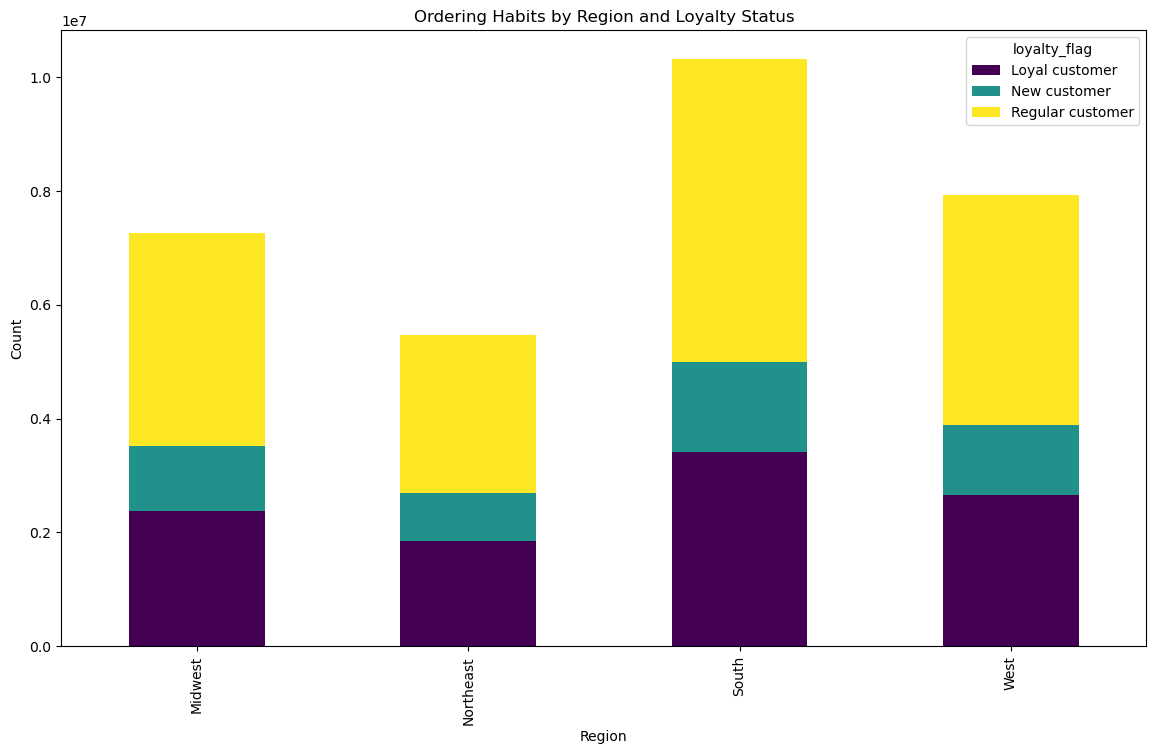

In [23]:
# Create a crosstab of region and loyalty_flag
loyalty_flag_region = pd.crosstab(df['region'], df['loyalty_flag'], dropna=False)
# Reorder columns for better visualization
loyalty_flag_region = loyalty_flag_region[['Loyal customer', 'New customer', 'Regular customer']]
# Create a stacked bar chart
loyalty_flag_region.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
# Title and labels
plt.title('Ordering Habits by Region and Loyalty Status')
plt.xlabel('Region')
plt.ylabel('Count')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization 4.10', 'loyalty_flag_region_bar.png'))
# Show the plot
plt.show()


## Connection between age and family status in terms of ordering habits


In [26]:
age_family_profile = pd.crosstab(df['age_group'],df['family_profile'], dropna = False)

In [27]:
age_family_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
age_group,,,,,,
18-29 years old,1400987,1487826,723576,706841,757596,740777
30-44 years old,2717250,2725322,0,908448,0,910346
45-59 years old,2746137,2736956,0,905865,0,922133
60-81 years old,3931591,3997642,0,1337129,0,1308142


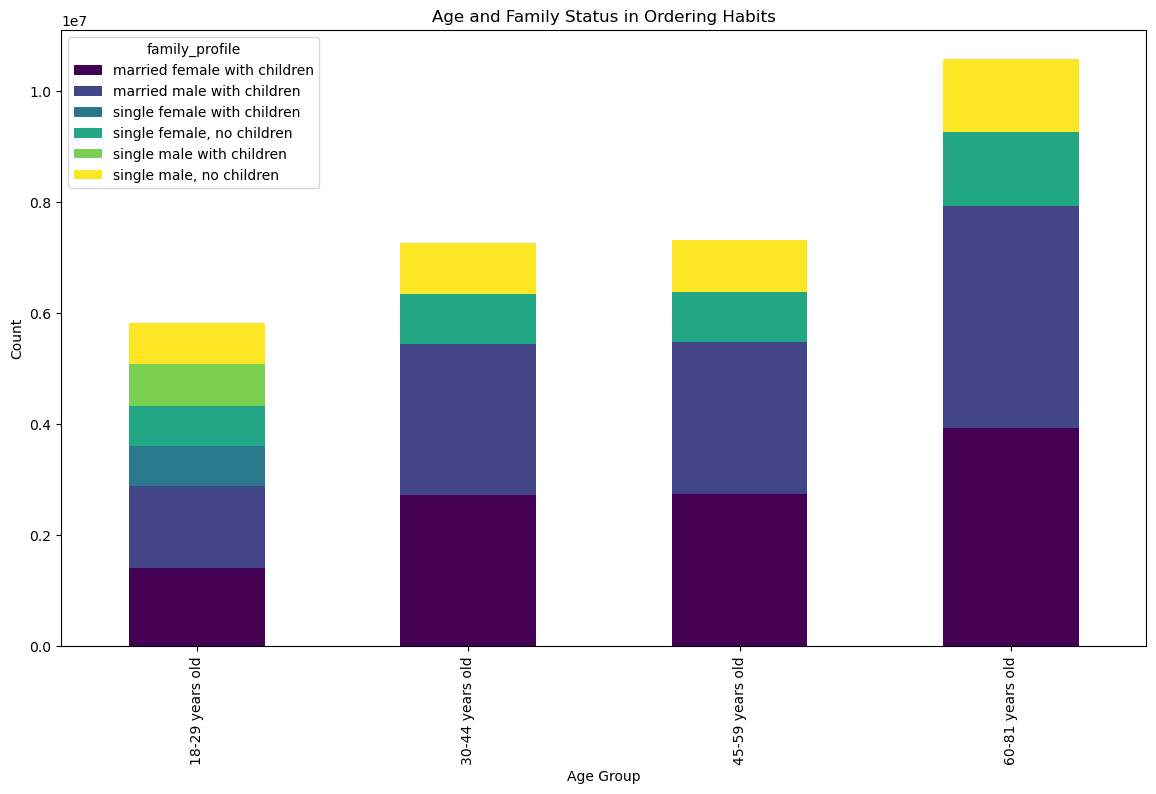

In [28]:
# Create a crosstab of age_group and family_profile
age_family_crosstab = pd.crosstab(df['age_group'], df['family_profile'], dropna=False)
# Reorder columns for better visualization
age_family_crosstab = age_family_crosstab[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]
# Create a stacked bar chart
age_family_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
# Title and labels
plt.title('Age and Family Status in Ordering Habits')
plt.xlabel('Age Group')
plt.ylabel('Count')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization 4.10', 'age_family_bar_chart.png'))
# Show the plot
plt.show()


## Exploring whether there is a connection between age and spending power (income)

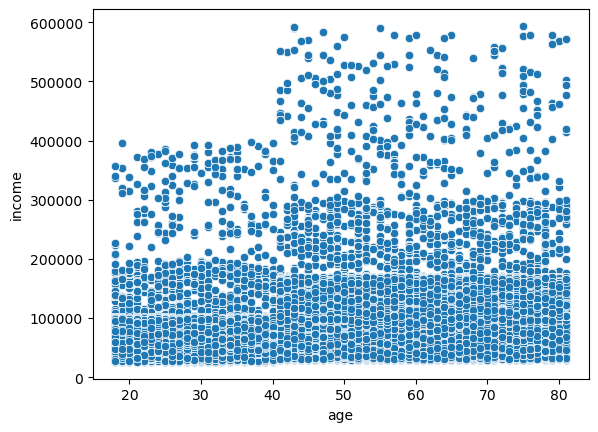

In [29]:
# There is a positive relationship between age and income. We can see that clearly on people of age of over 40
age_income_scatterplot = sns.scatterplot(x = 'age', y = 'income', data = df)

In [32]:
age_income_scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization 4.10', 'age_income_scatterplot.png'))

In [ ]:
ascatter_plot_age_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization 4.10', 'age_income_scatterplot.png'))

In [24]:
df.head()

,user_id,gender,state,age,date_joined,n_dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg,avg_price,spending_flag,customer_order_frequency,order_frequency_flag,region,activity_flag,age_group,income_group,departments,dependants_group,family_profile,week_days_orders
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,8,7.988889,Low spender,19.0,Regular customer,Midwest,active customer,45-59 years old,High Income,beverages,Has dependants,married female with children,Sunday
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8,7.988889,Low spender,19.0,Regular customer,Midwest,active customer,45-59 years old,High Income,beverages,Has dependants,married female with children,Thursday
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,8,7.988889,Low spender,19.0,Regular customer,Midwest,active customer,45-59 years old,High Income,beverages,Has dependants,married female with children,Sunday
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,12,7.057534,Low spender,26.0,Regular customer,West,active customer,30-44 years old,Low Income,beverages,No dependants,"single female, no children",Friday
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,1,20,16.0,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,12,Regular customer,12,7.057534,Low spender,26.0,Regular customer,West,active customer,30-44 years old,Low Income,beverages,No dependants,"single female, no children",Sunday


## Age and Family Status in Ordering Habits

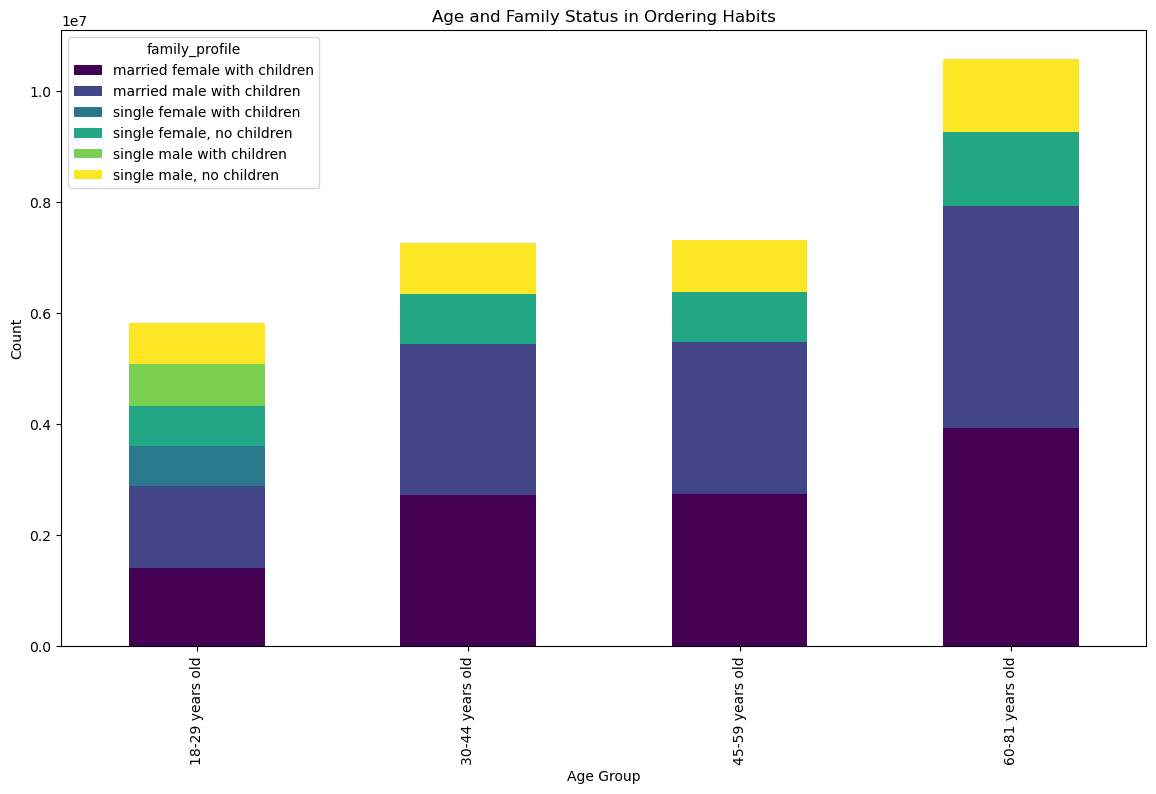

In [36]:
# Creating a crosstab of age_group and family_profile
age_family_crosstab = pd.crosstab(df['age_group'], df['family_profile'], dropna=False)
# Reorder columns for better visualization
age_family_crosstab = age_family_crosstab[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]
# Stacked bar chart
age_family_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Title and labels
plt.title('Age and Family Status in Ordering Habits')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization 4.10', 'age_family_bar_chart.png'))

# Show the plot
plt.show()


## Marital status

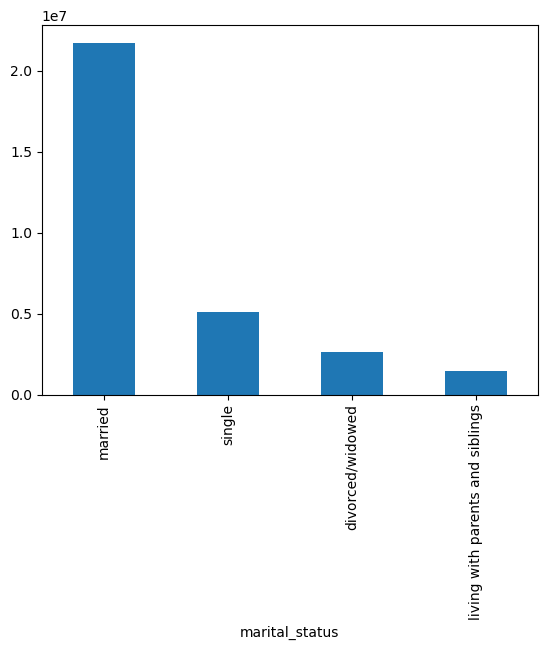

In [45]:
bar_marital = df['marital_status'].value_counts().plot.bar()

In [47]:
bar_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualization 4.10', 'bar_marital.png'))

In [ ]:
ords_prods_done = pd.read_pickle(os.path.join( path, '02 Data', 'Prepared Data', 'ords_prods_done.pkl'))

In [56]:
# importing this final cleaned data set
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_visual_the_end.pkl'))